# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified your best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasks around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.


# Good Luck

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [238]:
import numpy as np
import pandas as pd
import seaborn as sns

df5 = pd.read_csv('movie_train.csv')
df5.head()

Unnamed: 0  Release Year               Title  \
0       10281          1984      Silent Madness   
1        7341          1960  Desire in the Dust   
2       10587          1986         On the Edge   
3       25495          1988           Ram-Avtar   
4       16607          2013       Machete Kills   

                                                Plot           Director  \
0  A computer error leads to the accidental relea...     Simon Nuchtern   
1  Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2  A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3  Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4  Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   

                                                Cast   Genre  
0                Belinda Montgomery, Viveca Lindfors  horror  
1            Raymond Burr, Martha Hyer, Joan Bennett   drama  
2                              Bruce Dern, Pam Grier   drama  
3                   Sunny Deol, Anil Kapoor, Sridevi   drama  
4  Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action

### Task #2: Check for missing values:

In [2]:
# Check for NaN values:
df.isnull().sum()

Unnamed: 0        0
Release Year      0
Title             0
Plot              0
Director          0
Cast            169
Genre             0
dtype: int64

In [3]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        for i in df.itertuples():
            if rv.isspace():         # test 'review' for whitespace
                blanks.append(i)     # add matching index numbers to the list
        
len(blanks)

0

### Task #3: Remove NaN values:

In [232]:
df.dropna(inplace=True)

### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [233]:
df.head()

Release Year               Title  \
0          1984      Silent Madness   
1          1960  Desire in the Dust   
2          1986         On the Edge   
3          1988           Ram-Avtar   
4          2013       Machete Kills   

                                                Plot           Director  \
0  A computer error leads to the accidental relea...     Simon Nuchtern   
1  Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2  A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3  Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4  Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   

                                                Cast   Genre  \
0                Belinda Montgomery, Viveca Lindfors  horror   
1            Raymond Burr, Martha Hyer, Joan Bennett   drama   
2                              Bruce Dern, Pam Grier   drama   
3                   Sunny Deol, Anil Kapoor, Sridevi   drama   
4  Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action   

                                     tokenized_sents     me  
0  [computer, error, lead, accidental, release, h...  drama  
1  [lonnie, wilson, ken, scott, son, sharecropper...  drama  
2  [gaunt, bushy, bearded, 44-year, old, wes, hol...  drama  
3  [ram, avtar, childhood, good, friend, differen...  drama  
4  [machete, cortez, danny, trejo, sartana, river...  drama

In [255]:
df5.Genre.value_counts()

drama        3770
comedy       2724
horror        840
action        830
thriller      685
romance       649
western       525
adventure     331
crime         328
Name: Genre, dtype: int64

In [237]:
df4 = df.drop(columns=['Release Year', 'Title', 'Plot','Director','Cast','Genre', 'tokenized_sents'])
df4.head()

me
0  drama
1  drama
2  drama
3  drama
4  drama

In [239]:
df4.me.value_counts()

drama      10405
comedy        94
western        5
horror         4
action         4
crime          1
Name: me, dtype: int64

In [6]:
df['Genre'].value_counts()

drama        3673
comedy       2703
action        823
horror        810
thriller      680
romance       644
western       525
adventure     329
crime         326
Name: Genre, dtype: int64

In [12]:
df['Director'].value_counts()

Unknown                      55
Gerald Thomas                30
Blake Edwards                25
J. Lee Thompson              24
Lesley Selander              24
Terence Fisher               23
Richard Thorpe               23
John Sturges                 22
George Sherman               22
Jean Negulesco               20
George Marshall              20
John Gilling                 19
Gordon Douglas               19
William Beaudine             19
Basil Dearden                19
Roger Corman                 19
Woody Allen                  19
John Ford                    19
Raoul Walsh                  18
John Huston                  18
Arthur Hiller                17
Ralph Thomas                 17
Phil Karlson                 17
Lew Landers                  17
Douglas Sirk                 16
Henry Hathaway               16
Mark Robson                  16
John Farrow                  16
Joseph Kane                  16
Val Guest                    15
                             ..
Charles 

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

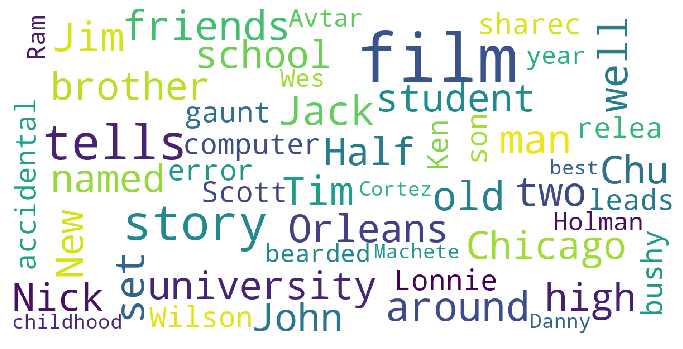

In [14]:
show_wordcloud(df['Plot'])

### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [257]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns=['Genre', 'Title','Director','Cast', 'Unnamed: 0'])
y = df5['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [139]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds,average=None)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None)))

In [140]:
def plot_corr_matrix(y_true,y_pred,classes,normalize=False,title=None,cmap=plt.cm.YlGn):
    #labels=['Sativa','Indica','Hybrid']
    cmat=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm=confusion_matrix(y_true,y_pred)
    fig, ax =plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [142]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve

In [144]:
from sklearn.metrics import auc, classification_report, confusion_matrix

Baseline Model Metrics:
Precision Score: [0.34610951 0.         0.         0.         0.         0.
 0.         0.         0.        ]
Recall Score: [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy Score: 0.34610951008645535
F1 Score: [0.51423678 0.         0.         0.         0.         0.
 0.         0.         0.        ]
Predicted     0   All
True                 
0          1201  1201
1           896   896
2           269   269
3           269   269
4           226   226
5           230   230
6           174   174
7            98    98
8           107   107
All        3470  3470
              precision    recall  f1-score   support

       drama       0.35      1.00      0.51      1201
      comedy       0.00      0.00      0.00       896
      horror       0.00      0.00      0.00       269
      action       0.00      0.00      0.00       269
    thriller       0.00      0.00      0.00       226
     romance       0.00      0.00      0.00       230
     western       0.00      0.00      

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 720x432 with 0 Axes>

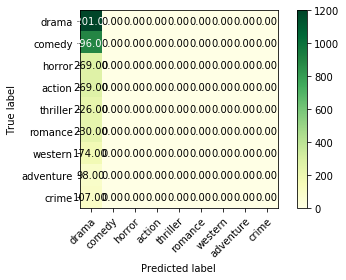

In [146]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

dummy.fit(X_train, y_train)
basepreds=dummy.predict(X_test)
sc=dummy.score(X_test, y_test) 
print("Baseline Model Metrics:")
print_metrics(y_test,basepreds)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,basepreds,['drama','comedy','horror', 'action','thriller', 'romance', 'western', 'adventure','crime'],'Baseline')
print(classification_report(y_test,basepreds,target_names=['drama','comedy','horror', 'action','thriller', 'romance', 'western', 'adventure','crime']))

In [ ]:
plot_corr_matrix(y_test,basepreds,['drama','comedy','horror', 'action','thriller', 'romance', 'western', 'adventure','crime'],'Baseline')
print(classification_report(y_test,basepreds,target_names=['drama','comedy','horror', 'action','thriller', 'romance', 'western', 'adventure','crime']))

In [258]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [259]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
# parser = English()
# parser = nlp(disable=['parser', 'ner'])
# Creating our tokenizer function
def spacy_tokenizer(text):

    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(text)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df5['cleaned']
Y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

In [148]:
df5['tokenized_sents'] = df.apply(lambda row: spacy_tokenizer(row['Plot']), axis=1)

In [260]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer,max_features=1000, min_df=5, max_df=0.7)


In [261]:
X1 = tfidf_vector.fit_transform(df['Plot']).toarray()
tfidf_vector.fit_transform(df['Plot'])

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Classifier
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])


search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': [4.641588833612778]},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [100, 200],
                 'classifier__max_features': [3,4]}
        ]



In [ ]:
from sklearn.model_selection import GridSearchCV


# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=3, verbose=2, n_jobs = 1)



In [26]:
# Fit grid search

best_model = clf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 6.4min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.4min remaining:    0.0s
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 6.5min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 
[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=3, class

[CV]  classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=4, classifier__n_estimators=100, total= 6.6min
[CV] classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_spli

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 157.6min finished
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [168]:
# View best model
best_model.best_estimator_.get_params()['classifier']

LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('vectorizer',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=0.7, max_features=1000,
                   min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function spacy_tokenizer at 0x1a25277048>,
                   use_idf=True, vocabulary=None)),
  ('classifier',
   LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                      max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbo

In [172]:
# model generation
pipe.fit(X_train,y_train)

AttributeError: 'list' object has no attribute 'lower'

In [199]:
X1 = X_test.to_frame()
X1.head()

tokenized_sents
6075  [story, focus, beleaguered, new, yorkers, appe...
3544  [year, ago, wild, bear, steal, calf, mitch, mo...
9290  [jerry, gooding, nick, sanz, close, friend, lo...
5032  [1962, faber, college, freshman, lawrence, lar...
2483  [ichiro, aoye, toshirō, mifune, artist, meet, ...

In [201]:
y1 = y_test.to_frame()
y1.head()

Genre
6075  comedy
3544   drama
9290  comedy
5032  comedy
2483   drama

In [230]:
ally = X1.merge(y1, left_index=True, right_index=True)
ally.head()

tokenized_sents   Genre
6075  [story, focus, beleaguered, new, yorkers, appe...  comedy
3544  [year, ago, wild, bear, steal, calf, mitch, mo...   drama
9290  [jerry, gooding, nick, sanz, close, friend, lo...  comedy
5032  [1962, faber, college, freshman, lawrence, lar...  comedy
2483  [ichiro, aoye, toshirō, mifune, artist, meet, ...   drama

In [231]:
ally.Genre.value_counts()

drama        1251
comedy        917
action        280
horror        276
thriller      220
romance       201
western       148
adventure     125
crime         108
Name: Genre, dtype: int64

In [207]:
alls.drop(columns=['tokenized_sents'],inplace=True)
alls.head()

Genre
6075  comedy
3544   drama
9290  comedy
5032  comedy
2483   drama

In [208]:
alls.to_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/nyc-ds-100719-lectures/week-11/NLP/classification-assessment/finalanswers_sb.csv', header=False)

In [197]:
type(y_test)

pandas.core.series.Series

In [95]:
y_train.head()

8004    5
5113    5
9399    3
3220    1
1242    4
Name: Genre, dtype: int64

In [209]:
predictions[:4]

array(['drama', 'drama', 'drama', 'action'], dtype=object)

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [134]:
from sklearn.preprocessing import StandardScaler
#Scale Training Features
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [84]:
# Form a prediction set
predictions = pipe.predict(X_test)

In [88]:
predictions

array(['drama', 'drama', 'drama', ..., 'drama', 'drama', 'drama'],
      dtype=object)

In [242]:
preddy = predictions.tolist()

In [244]:
preddd = pd.DataFrame(preddy)
preddd.head()

0
0   drama
1   drama
2   drama
3  action
4   drama

In [253]:
preddd.rename(columns={0:'me'},inplace=True)


In [254]:
preddd.me.value_counts()

drama        65637
comedy         601
horror          31
western         25
action          20
thriller         7
adventure        6
crime            6
romance          3
Name: me, dtype: int64

In [90]:
len(predictions)

66336

In [89]:
len(X)

10513

In [87]:
len(df)

10682

In [126]:
preds1 = predictions.tolist()
len(preds1)

66336

In [217]:
use = preds1[0::18]

In [218]:
len(use)

3686

In [219]:
me = use[:-160]

In [210]:
len(X_test)

3526

In [211]:
len(y_test)

3526

In [ ]:
len()

In [221]:
alls['me'] = me

In [222]:
alls.head()

Genre      me
6075  comedy   drama
3544   drama   drama
9290  comedy  action
5032  comedy   drama
2483   drama   drama

In [223]:
alls.drop(columns=['Genre'],inplace=True)

In [229]:
alls.me.value_counts()

drama      3482
comedy       38
action        3
western       2
horror        1
Name: me, dtype: int64

In [224]:
alls.to_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/nyc-ds-100719-lectures/week-11/NLP/classification-assessment/finalanswers_sb.csv', header=False)

In [262]:
df.head()

Release Year               Title  \
0          1984      Silent Madness   
1          1960  Desire in the Dust   
2          1986         On the Edge   
3          1988           Ram-Avtar   
4          2013       Machete Kills   

                                                Plot           Director  \
0  A computer error leads to the accidental relea...     Simon Nuchtern   
1  Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2  A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3  Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4  Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   

                                                Cast   Genre  \
0                Belinda Montgomery, Viveca Lindfors  horror   
1            Raymond Burr, Martha Hyer, Joan Bennett   drama   
2                              Bruce Dern, Pam Grier   drama   
3                   Sunny Deol, Anil Kapoor, Sridevi   drama   
4  Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action   

                                     tokenized_sents     me  
0  [computer, error, lead, accidental, release, h...  drama  
1  [lonnie, wilson, ken, scott, son, sharecropper...  drama  
2  [gaunt, bushy, bearded, 44-year, old, wes, hol...  drama  
3  [ram, avtar, childhood, good, friend, differen...  drama  
4  [machete, cortez, danny, trejo, sartana, river...  drama

In [263]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['tokenized_sents']).toarray()
final_features.shape

AttributeError: 'list' object has no attribute 'lower'

In [190]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [192]:
df.to_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/nyc-ds-100719-lectures/week-11/NLP/classification-assessment/finalanswers_sb.csv')

In [127]:
preds1[:10]

['drama',
 'drama',
 'drama',
 'action',
 'drama',
 'drama',
 'drama',
 'drama',
 'drama',
 'drama']

In [129]:
X_train.head()

Release Year  computer  error  lead  accidental  release  homicidal  \
8004          1944         0      0     0           0        0          0   
5113          2001         0      0     0           0        0          0   
9399          1973         0      0     0           0        0          0   
3220          2000         0      0     0           0        0          0   
1242          1975         0      0     0           0        0          0   

      patient  howard  johns  mental  institution  mute  murderer  return  \
8004        0       0      0       0            0     0         0       1   
5113        0       0      0       0            0     0         0       0   
9399        0       0      0       0            0     0         0       0   
3220        0       0      0       0            0     0         0       0   
1242        0       0      0       0            0     0         0       0   

      scene  original  crimes.[2  lonnie  wilson  ken  scott  son  \
8004      0         0          0       0       0    0      0    0   
5113      0         0          0       0       0    0      0    0   
9399      0         0          0       0       0    0      0    0   
3220      0         0          0       0       0    0      0    0   
1242      0         0          0       0       0    0      0    0   

      sharecropper  zuba  douglas  fowley  small  southern  hometown  clinton  \
8004             0     0        0       0      0         0         0        0   
5113             0     0        0       0      0         0         0        0   
9399             0     0        0       0      0         0         0        0   
3220             0     0        0       0      0         0         0        0   
1242             0     0        0       0      0         0         0        0   

      louisiana  spend  year  chain  gang  kill  colonel  ben  marquand  \
8004          0      0     0      0     0     0        0    0         0   
5113          0      0     0      0     0     1        0    0         0   
9399          0      0     0      0     0     0        0    0         0   
3220          0      0     0      0     0     0        0    0         0   
1242          0      0     0      0     0     0        0    0         0   

      davey  automobile  accident  revive  love  affair  melinda  martha  \
8004      0           0         0       0     0       0        0       0   
5113      0           0         1       0     1       0        0       0   
9399      0           0         0       0     0       0        0       0   
3220      0           0         0       0     0       0        0       0   
1242      0           0         0       0     0       0        0       0   

      hyer  mrs.  thomas  marry  dr.  ned  brett  halsey  serve  time  place  \
8004     0     1       0      1    0    0      0       0      0     0      1   
5113     0     0       0      1    0    0      0       0      0     1      0   
9399     0     0       0      0    0    0      0       0      0     0      0   
3220     0     0       0      0    0    0      0       0      0     0      0   
1242     0     0       0      0    0    0      0       0      0     0      0   

      caused.[4  somewhat  miffed  incite  wife  infidelity  verify  catch  \
8004          0         0       0       0     0           0       0      0   
5113          0         0       0       0     0           0       0      0   
9399          0         0       0       0     0           0       0      0   
3220          0         0       0       0     0           0       0      0   
1242          0         0       0       0     0           0       0      0   

      semi  torrid  embrace  hunting  lodge  look  explanation  shoot  wound  \
8004     0       0        0        0      0     0            0      0      1   
5113     0       0        0        0      0     1            0      0      0   
9399     0       0        0        0      0     0            0      0      0   


In [131]:
len(X_test)

3470

In [132]:
len(X_train)

7043

In [80]:
preds = prediction.tolist()

In [128]:
preds[:10]

['drama',
 'drama',
 'action',
 'drama',
 'thriller',
 'drama',
 'western',
 'comedy',
 'drama',
 'thriller']

In [122]:
len(preds)

3470

In [123]:
preds

['drama',
 'drama',
 'action',
 'drama',
 'thriller',
 'drama',
 'western',
 'comedy',
 'drama',
 'thriller',
 'comedy',
 'comedy',
 'comedy',
 'drama',
 'thriller',
 'action',
 'drama',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'western',
 'comedy',
 'adventure',
 'action',
 'horror',
 'comedy',
 'romance',
 'drama',
 'drama',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'drama',
 'drama',
 'thriller',
 'comedy',
 'comedy',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'comedy',
 'action',
 'comedy',
 'horror',
 'comedy',
 'comedy',
 'drama',
 'comedy',
 'drama',
 'romance',
 'drama',
 'horror',
 'drama',
 'comedy',
 'adventure',
 'comedy',
 'drama',
 'adventure',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'comedy',
 'action',
 'comedy',
 'comedy',
 'drama',
 'comedy',
 'comedy',
 'drama',
 'drama',
 'drama',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'drama',
 'drama',
 'drama',
 'drama',
 'comedy',
 'thriller',
 'drama',
 'drama',
 'drama',
 'adventure

In [82]:
df['preds'] = preds

ValueError: Length of values does not match length of index

In [96]:
# Report the confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [3470, 66336]

In [32]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

      action       0.50      0.42      0.45       269
   adventure       0.49      0.20      0.29        98
      comedy       0.54      0.63      0.58       896
       crime       0.44      0.10      0.17       107
       drama       0.54      0.72      0.62      1201
      horror       0.74      0.62      0.68       269
     romance       0.59      0.25      0.35       230
    thriller       0.29      0.11      0.15       226
     western       0.79      0.61      0.69       174

    accuracy                           0.56      3470
   macro avg       0.55      0.41      0.44      3470
weighted avg       0.55      0.56      0.53      3470



In [33]:
# Print the overall accuracy and F1 score
print(metrics.accuracy_score(y_test,predictions))

0.555043227665706


In [34]:
prediction = best_model.predict(X_test)

In [121]:
preds2 = prediction_tolist()

NameError: name 'prediction_tolist' is not defined

In [40]:
print(metrics.confusion_matrix(y_test,prediction))

[[113   6  45   6  60   9   6  23   1]
 [  1  32  21   1  31   5   1   1   5]
 [ 17  14 564   6 224  18  21  14  18]
 [ 17   2  26  18  25   2   1  10   6]
 [ 40  19 252  15 779  14  30  35  17]
 [  8   3  25   0  42 173   1  16   1]
 [ 12   0  46   0  96   1  68   5   2]
 [ 24   2  42   3  88  23   4  40   0]
 [  6   3  17   2  25   2   0   1 118]]


In [36]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

      action       0.47      0.42      0.45       269
   adventure       0.40      0.33      0.36        98
      comedy       0.54      0.63      0.58       896
       crime       0.35      0.17      0.23       107
       drama       0.57      0.65      0.61      1201
      horror       0.70      0.64      0.67       269
     romance       0.52      0.30      0.38       230
    thriller       0.28      0.18      0.22       226
     western       0.70      0.68      0.69       174

    accuracy                           0.55      3470
   macro avg       0.50      0.44      0.46      3470
weighted avg       0.54      0.55      0.54      3470



In [37]:
print(metrics.accuracy_score(y_test,prediction))

0.5489913544668588


In [ ]:
LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
steps': [('vectorizer',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=0.7, max_features=1000,
                   min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function spacy_tokenizer at 0x1a25277048>,
                   use_idf=True, vocabulary=None)),

In [72]:
# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])


search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C':4.641588833612778},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [100, 200],
                 'classifier__max_features': [1000]}
        ]


In [ ]:
pipeline = make_pipeline(
    feature_set_extraction,
    TruncatedSVD(n_components=50),
    LogisticRegression(penalty='l2', C='4.641588833612778')

##### Practice

In [120]:
list(df['tokenized_sents'])

KeyError: 'tokenized_sents'

In [45]:
# Cleaning up df, creating dummy columns for all effects

effects=[]
pos=list(df['tokenized_sents'])
for p in pos:
    for i in p:
        if i not in effects:
            effects.append(i)
for i in effects:
    title=str(i)
    title=[]
    for x in df.tokenized_sents:
        if i in x:
            title.append(1)
        else:
            title.append(0)
    df[i]=title

### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [47]:
pd.set_option('display.max_columns', 1000)
df.head()

Unnamed: 0  Release Year               Title  \
0       10281          1984      Silent Madness   
1        7341          1960  Desire in the Dust   
2       10587          1986         On the Edge   
3       25495          1988           Ram-Avtar   
4       16607          2013       Machete Kills   

                                                Plot           Director  \
0  A computer error leads to the accidental relea...     Simon Nuchtern   
1  Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2  A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3  Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4  Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   

                                                Cast   Genre  \
0                Belinda Montgomery, Viveca Lindfors  horror   
1            Raymond Burr, Martha Hyer, Joan Bennett   drama   
2                              Bruce Dern, Pam Grier   drama   
3                   Sunny Deol, Anil Kapoor, Sridevi   drama   
4  Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action   

                                     tokenized_sents  computer  error  lead  \
0  [computer, error, lead, accidental, release, h...         1      1     1   
1  [lonnie, wilson, ken, scott, son, sharecropper...         0      0     0   
2  [gaunt, bushy, bearded, 44-year, old, wes, hol...         0      0     0   
3  [ram, avtar, childhood, good, friend, differen...         0      0     0   
4  [machete, cortez, danny, trejo, sartana, river...         0      0     1   

   accidental  release  homicidal  patient  howard  johns  mental  \
0           1        1          1        1       1      1       1   
1           0        0          0        0       0      0       0   
2           0        0          0        0       0      0       0   
3           0        0          0        0       0      0       0   
4           0        0          0        0       0      0       0   

   institution  mute  murderer  return  scene  original  crimes.[2  lonnie  \
0            1     1         1       1      1         1          1       0   
1            0     0         0       1      0         0          0       1   
2            0     0         0       1      0         0          0       0   
3            0     0         0       0      0         0          0       0   
4            0     0         0       1      0         0          0       0   

   wilson  ken  scott  son  sharecropper  zuba  douglas  fowley  small  \
0       0    0      0    0             0     0        0       0      0   
1       1    1      1    1             1     1        1       1      1   
2       0    0      0    0             0     0        0       0      0   
3       0    0      0    0             0     0        0       0      0   
4       0    0      0    0             0     0        0       0      0   

   southern  hometown  clinton  louisiana  spend  year  chain  gang  kill  \
0         0         0        0          0      0     0      0     0     0   
1         1         1        1          1      1     1      1     1     1   
2         0         0        0          0      0     0      0     0     0   
3         0         0        0          0      0     0      0     0     0   
4         0         0        0          0      0     0      0     0     1   

   colonel  ben  marquand  davey  automobile  accident  revive  love  affair  \
0        0    0         0      0           0         0       0     0       0   
1        1    1         1      1           1         1       1     1       1   
2        0    0         0      0           0         0       0     0       0   
3        0    0         0      0           0         0       0     1       0   
4        0    0         0      0           0         0       0     0       0   

   melinda  martha  hyer  mrs.  thomas  marry  dr.  ned  brett  halsey  serve  \
0        0       0     0     0 

In [48]:
df.info()

KeyboardInterrupt: 

In [49]:
df.Genre=df.Genre.map({'drama':0,'comedy':1,
                       'horror':2,'action':3,
                       'thriller':4,'romance':5,
                       'western':6, 'adventure':7,'crime':8})

In [118]:
df.head()

Unnamed: 0  Release Year               Title  \
0       10281          1984      Silent Madness   
1        7341          1960  Desire in the Dust   
2       10587          1986         On the Edge   
3       25495          1988           Ram-Avtar   
4       16607          2013       Machete Kills   

                                                Plot           Director  \
0  A computer error leads to the accidental relea...     Simon Nuchtern   
1  Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2  A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3  Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4  Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   

                                                Cast   Genre  
0                Belinda Montgomery, Viveca Lindfors  horror  
1            Raymond Burr, Martha Hyer, Joan Bennett   drama  
2                              Bruce Dern, Pam Grier   drama  
3                   Sunny Deol, Anil Kapoor, Sridevi   drama  
4  Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action

In [117]:
df.iloc[:,1:9]

Release Year                                          Title  \
0              1984                                 Silent Madness   
1              1960                             Desire in the Dust   
2              1986                                    On the Edge   
3              1988                                      Ram-Avtar   
4              2013                                  Machete Kills   
5              2012                                      Chupkatha   
6              1955                                   Rage at Dawn   
7              1976                                Welcome to L.A.   
8              1950                                 My Blue Heaven   
9              1986                                       Wildcats   
10             2008                                    Vaazhthugal   
11             2004                                  Rice Rhapsody   
12             1957                                      Lucky Jim   
13             1954           Al-Malak al-Zalem (The Unjust Angel)   
14             1958                                    Cry Terror!   
15             2000                     The Legend of Bagger Vance   
16             2004                                          Venky   
17             1987                                   City on Fire   
18             1942                          The Moon and Sixpence   
19             1965                                Carry On Cowboy   
20             2005                                   Transamerica   
21             2004                      Kekexili: Mountain Patrol   
22             2012  Do-Deca-Pentathlon, TheThe Do-Deca-Pentathlon   
23             2004                      Christmas with the Kranks   
24             1958                                      Hot Spell   
25             1986                              The Best of Times   
26             1942                              On the Sunny Side   
27             1970                                Zabriskie Point   
28             2005                                    Roll Bounce   
29             1948                         Waterfront at Midnight   
...             ...                                            ...   
10652          2010                                Good Neighbours   
10653          1993                                    Hard Target   
10654          1963                            Lilies of the Field   
10655          1983                              Lone Wolf McQuade   
10656          1941                                  Lady Scarface   
10657          1949                                    The Heiress   
10658          2006                               Peaceful Warrior   
10659          1952                                    Glory Alley   
10660          1998                           A Price Above Rubies   
10661          2014                  Moron 5.2: The Transformation   
10662          1970                                  Pavitra Paapi   
10663          2009                                     Phir Kabhi   
10664          1989                             Who's Harry Crumb?   
10665          1992                                    City of Joy   
10666          2013                                     Policegiri   
10667          1958                        The High Cost of Loving   
10668          1952                                   My Man and I   
10669          2001                               The Fourth Angel   
10670          2002                                 Moonlight Mile   
10671          2008                          John Appa Rao 40 plus   
10672          1955                       As Long as They're Happy   
10673          1982                                        Porky's   
10674          1951                          I'll Get You for This   
10675          1941                           Washington Melodrama   
10676          1996                           The Great White Hype   
10677          19

In [119]:
df1.head()

Release Year  Genre  computer  error  lead  accidental  release  homicidal  \
0          1984      2         1      1     1           1        1          1   
1          1960      0         0      0     0           0        0          0   
2          1986      0         0      0     0           0        0          0   
3          1988      0         0      0     0           0        0          0   
4          2013      3         0      0     1           0        0          0   

   patient  howard  johns  mental  institution  mute  murderer  return  scene  \
0        1       1      1       1            1     1         1       1      1   
1        0       0      0       0            0     0         0       1      0   
2        0       0      0       0            0     0         0       1      0   
3        0       0      0       0            0     0         0       0      0   
4        0       0      0       0            0     0         0       1      0   

   original  crimes.[2  lonnie  wilson  ken  scott  son  sharecropper  zuba  \
0         1          1       0       0    0      0    0             0     0   
1         0          0       1       1    1      1    1             1     1   
2         0          0       0       0    0      0    0             0     0   
3         0          0       0       0    0      0    0             0     0   
4         0          0       0       0    0      0    0             0     0   

   douglas  fowley  small  southern  hometown  clinton  louisiana  spend  \
0        0       0      0         0         0        0          0      0   
1        1       1      1         1         1        1          1      1   
2        0       0      0         0         0        0          0      0   
3        0       0      0         0         0        0          0      0   
4        0       0      0         0         0        0          0      0   

   year  chain  gang  kill  colonel  ben  marquand  davey  automobile  \
0     0      0     0     0        0    0         0      0           0   
1     1      1     1     1        1    1         1      1           1   
2     0      0     0     0        0    0         0      0           0   
3     0      0     0     0        0    0         0      0           0   
4     0      0     0     1        0    0         0      0           0   

   accident  revive  love  affair  melinda  martha  hyer  mrs.  thomas  marry  \
0         0       0     0       0        0       0     0     0       0      0   
1         1       1     1       1        1       1     1     1       1      1   
2         0       0     0       0        0       0     0     0       0      0   
3         0       0     1       0        0       0     0     0       0      1   
4         0       0     0       0        0       0     0     0       0      0   

   dr.  ned  brett  halsey  serve  time  place  caused.[4  somewhat  miffed  \
0    0    0      0       0      0     0      0          0         0       0   
1    1    1      1       1      1     1      1          1         1       1   
2    0    0      0       0      0     0      0          0         0       0   
3    0    0      0       0      0     1      0          0         0       0   
4    0    0      0       0      0     1      0          0         0       0   

   incite  wife  infidelity  verify  catch  semi  torrid  embrace  hunting  \
0       0     0           0       0      0     0       0        0        0   
1       1     1           1       1      1     1       1        1        1   
2       0     0           0       0      0     0       0        0        0   
3       0     1           0       0      0     0       0        0        0   
4       0     0           0       0      1     0       0        0        0   

   lodge  look  explanation  shoot  wound  defend  innocence  claim  rape  \
0      0     0            0      0      0       0          0      0     0   
1      1     1            1      1      1       1          1      1     1

In [54]:
df1=df
df1.drop(columns=['tokenized_sents','Title','Plot','Director','Cast','Unnamed: 0'], inplace=True)

In [55]:
df1.head()

Release Year  Genre  computer  error  lead  accidental  release  homicidal  \
0          1984      2         1      1     1           1        1          1   
1          1960      0         0      0     0           0        0          0   
2          1986      0         0      0     0           0        0          0   
3          1988      0         0      0     0           0        0          0   
4          2013      3         0      0     1           0        0          0   

   patient  howard  johns  mental  institution  mute  murderer  return  scene  \
0        1       1      1       1            1     1         1       1      1   
1        0       0      0       0            0     0         0       1      0   
2        0       0      0       0            0     0         0       1      0   
3        0       0      0       0            0     0         0       0      0   
4        0       0      0       0            0     0         0       1      0   

   original  crimes.[2  lonnie  wilson  ken  scott  son  sharecropper  zuba  \
0         1          1       0       0    0      0    0             0     0   
1         0          0       1       1    1      1    1             1     1   
2         0          0       0       0    0      0    0             0     0   
3         0          0       0       0    0      0    0             0     0   
4         0          0       0       0    0      0    0             0     0   

   douglas  fowley  small  southern  hometown  clinton  louisiana  spend  \
0        0       0      0         0         0        0          0      0   
1        1       1      1         1         1        1          1      1   
2        0       0      0         0         0        0          0      0   
3        0       0      0         0         0        0          0      0   
4        0       0      0         0         0        0          0      0   

   year  chain  gang  kill  colonel  ben  marquand  davey  automobile  \
0     0      0     0     0        0    0         0      0           0   
1     1      1     1     1        1    1         1      1           1   
2     0      0     0     0        0    0         0      0           0   
3     0      0     0     0        0    0         0      0           0   
4     0      0     0     1        0    0         0      0           0   

   accident  revive  love  affair  melinda  martha  hyer  mrs.  thomas  marry  \
0         0       0     0       0        0       0     0     0       0      0   
1         1       1     1       1        1       1     1     1       1      1   
2         0       0     0       0        0       0     0     0       0      0   
3         0       0     1       0        0       0     0     0       0      1   
4         0       0     0       0        0       0     0     0       0      0   

   dr.  ned  brett  halsey  serve  time  place  caused.[4  somewhat  miffed  \
0    0    0      0       0      0     0      0          0         0       0   
1    1    1      1       1      1     1      1          1         1       1   
2    0    0      0       0      0     0      0          0         0       0   
3    0    0      0       0      0     1      0          0         0       0   
4    0    0      0       0      0     1      0          0         0       0   

   incite  wife  infidelity  verify  catch  semi  torrid  embrace  hunting  \
0       0     0           0       0      0     0       0        0        0   
1       1     1           1       1      1     1       1        1        1   
2       0     0           0       0      0     0       0        0        0   
3       0     1           0       0      0     0       0        0        0   
4       0     0           0       0      1     0       0        0        0   

   lodge  look  explanation  shoot  wound  defend  innocence  claim  rape  \
0      0     0            0      0      0       0          0      0     0   
1      1     1            1      1      1       1          1      1     1

In [56]:
df.head()

# must all columns minus release year back

Release Year  Genre  computer  error  lead  accidental  release  homicidal  \
0          1984      2         1      1     1           1        1          1   
1          1960      0         0      0     0           0        0          0   
2          1986      0         0      0     0           0        0          0   
3          1988      0         0      0     0           0        0          0   
4          2013      3         0      0     1           0        0          0   

   patient  howard  johns  mental  institution  mute  murderer  return  scene  \
0        1       1      1       1            1     1         1       1      1   
1        0       0      0       0            0     0         0       1      0   
2        0       0      0       0            0     0         0       1      0   
3        0       0      0       0            0     0         0       0      0   
4        0       0      0       0            0     0         0       1      0   

   original  crimes.[2  lonnie  wilson  ken  scott  son  sharecropper  zuba  \
0         1          1       0       0    0      0    0             0     0   
1         0          0       1       1    1      1    1             1     1   
2         0          0       0       0    0      0    0             0     0   
3         0          0       0       0    0      0    0             0     0   
4         0          0       0       0    0      0    0             0     0   

   douglas  fowley  small  southern  hometown  clinton  louisiana  spend  \
0        0       0      0         0         0        0          0      0   
1        1       1      1         1         1        1          1      1   
2        0       0      0         0         0        0          0      0   
3        0       0      0         0         0        0          0      0   
4        0       0      0         0         0        0          0      0   

   year  chain  gang  kill  colonel  ben  marquand  davey  automobile  \
0     0      0     0     0        0    0         0      0           0   
1     1      1     1     1        1    1         1      1           1   
2     0      0     0     0        0    0         0      0           0   
3     0      0     0     0        0    0         0      0           0   
4     0      0     0     1        0    0         0      0           0   

   accident  revive  love  affair  melinda  martha  hyer  mrs.  thomas  marry  \
0         0       0     0       0        0       0     0     0       0      0   
1         1       1     1       1        1       1     1     1       1      1   
2         0       0     0       0        0       0     0     0       0      0   
3         0       0     1       0        0       0     0     0       0      1   
4         0       0     0       0        0       0     0     0       0      0   

   dr.  ned  brett  halsey  serve  time  place  caused.[4  somewhat  miffed  \
0    0    0      0       0      0     0      0          0         0       0   
1    1    1      1       1      1     1      1          1         1       1   
2    0    0      0       0      0     0      0          0         0       0   
3    0    0      0       0      0     1      0          0         0       0   
4    0    0      0       0      0     1      0          0         0       0   

   incite  wife  infidelity  verify  catch  semi  torrid  embrace  hunting  \
0       0     0           0       0      0     0       0        0        0   
1       1     1           1       1      1     1       1        1        1   
2       0     0           0       0      0     0       0        0        0   
3       0     1           0       0      0     0       0        0        0   
4       0     0           0       0      1     0       0        0        0   

   lodge  look  explanation  shoot  wound  defend  innocence  claim  rape  \
0      0     0            0      0      0       0          0      0     0   
1      1     1            1      1      1       1          1      1     1

In [58]:
X = df1.drop(columns=['Genre'])
y = df1.Genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
X_test.head()

Release Year  computer  error  lead  accidental  release  homicidal  \
3485          1942         0      0     0           0        0          0   
5600          1981         0      0     1           0        1          0   
34            2013         0      0     1           0        0          0   
2357          2013         0      0     0           0        0          0   
2945          1988         0      0     1           0        0          0   

      patient  howard  johns  mental  institution  mute  murderer  return  \
3485        0       0      0       0            0     0         0       0   
5600        0       1      0       1            0     0         0       1   
34          0       0      0       0            0     0         0       0   
2357        0       0      0       0            0     0         0       0   
2945        0       0      0       0            0     0         0       0   

      scene  original  crimes.[2  lonnie  wilson  ken  scott  son  \
3485      0         0          0       0       0    0      0    0   
5600      1         0          0       0       0    0      0    1   
34        0         0          0       0       0    0      0    0   
2357      0         0          0       0       0    0      0    1   
2945      0         0          0       0       0    0      0    0   

      sharecropper  zuba  douglas  fowley  small  southern  hometown  clinton  \
3485             0     0        0       0      1         0         1        0   
5600             0     0        0       0      1         0         0        0   
34               0     0        0       0      0         0         0        0   
2357             0     0        0       0      0         0         0        0   
2945             0     0        0       0      0         0         0        0   

      louisiana  spend  year  chain  gang  kill  colonel  ben  marquand  \
3485          0      1     0      0     0     0        0    0         0   
5600          0      0     0      0     1     1        0    0         0   
34            0      0     0      0     1     1        0    0         0   
2357          0      0     0      0     0     0        0    0         0   
2945          0      0     0      0     0     1        0    0         0   

      davey  automobile  accident  revive  love  affair  melinda  martha  \
3485      0           0         0       0     1       0        0       0   
5600      0           1         0       0     1       1        0       0   
34        0           0         0       0     0       0        0       0   
2357      0           0         0       0     0       0        0       0   
2945      0           0         1       0     0       0        0       0   

      hyer  mrs.  thomas  marry  dr.  ned  brett  halsey  serve  time  place  \
3485     0     0       0      0    0    0      0       0      0     1      0   
5600     0     0       0      1    0    0      0       0      0     1      1   
34       0     0       0      0    0    0      0       0      0     0      1   
2357     0     0       0      0    0    0      0       0      0     0      0   
2945     0     0       0      0    0    0      0       0      0     0      0   

      caused.[4  somewhat  miffed  incite  wife  infidelity  verify  catch  \
3485          0         0       0       0     0           0       0      0   
5600          0         0       0       0     1           1       0      0   
34            0         0       0       0     0           0       0      0   
2357          0         0       0       0     0           0       0      0   
2945          0         0       0       0     0           0       0      0   

      semi  torrid  embrace  hunting  lodge  look  explanation  shoot  wound  \
3485     0       0        0        0      0     0            0      0      0   
5600     0       0        0        0      0     0            0      1      1   
34       0       0        0        0      0     0            0      1      0   


In [60]:
predictions = pipe.predict(X_test)

In [111]:
print(metrics.confusion_matrix(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [3470, 66336]

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [64]:
len(X_test), len(y_test)

(3470, 3470)

In [66]:
len(X_train), len(y_train)

(7043, 7043)

In [70]:
X_test

Release Year  computer  error  lead  accidental  release  homicidal  \
3485           1942         0      0     0           0        0          0   
5600           1981         0      0     1           0        1          0   
34             2013         0      0     1           0        0          0   
2357           2013         0      0     0           0        0          0   
2945           1988         0      0     1           0        0          0   
7310           2008         0      0     0           0        0          0   
36             1950         0      0     1           0        0          1   
5925           1968         0      0     0           0        0          0   
568            1964         0      0     1           0        0          0   
9796           1991         0      0     0           0        0          0   
1774           1989         0      0     0           0        1          0   
5237           1942         0      0     0           0        0          0   
4558           1975         0      0     0           0        0          0   
3922           1947         0      0     0           0        0          0   
5612           2012         0      0     0           0        1          0   
9975           1988         0      0     0           0        0          0   
10461          2009         0      0     1           0        0          0   
9013           1997         0      0     0           0        0          0   
6091           1967         0      0     0           0        0          0   
6604           1942         0      0     0           0        0          0   
7956           2009         0      0     0           0        0          0   
1695           1956         0      0     1           0        0          0   
9380           1976         0      0     0           0        0          0   
8281           1962         0      0     1           0        0          0   
8711           2006         0      0     0           0        0          0   
3129           1946         0      0     0           0        0          0   
40             1941         0      0     0           0        0          0   
2220           1979         0      0     0           0        0          0   
7742           1944         0      0     1           0        1          0   
4609           2017         0      0     0           0        0          0   
...             ...       ...    ...   ...         ...      ...        ...   
105            1955         0      0     0           0        0          0   
4153           1988         0      0     0           0        0          0   
1682           2007         0      0     0           0        0          0   
7680           1961         0      0     0           0        0          0   
1556           1959         0      0     0           0        0          0   
3032           1966         0      0     0           0        0          0   
5740           2013         0      0     0           0        0          0   
1351           1989         0      0     0           0        0          0   
5919           1969         1      0     1           0        0          0   
7970           1960         0      0     1           0        0          0   
5150           1957         0      0     1           0        0          0   
1463           2004         0      0     0           0        0          0   
5300           1969         0      0     0           0        0          0   
215            1995         0      0     0           0        0          0   
3402           1985         0      0     0           0        1          0   
6060           1988         0      0     0           0        1          0   
861            1975         0      1     0           0        0          0   
2955           1963         0      0     0           0        0          0   
5079           1946         0      0     0           0        0          0   
8457           2000         0

In [102]:
prediction = best_model.predict(X_test)

In [103]:
len(prediction)

66336

In [110]:
predictions[:100]

array(['drama', 'drama', 'drama', 'action', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'comedy', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama',
       'western', 'action', 'drama', 'drama', 'drama', 'drama', 'drama',
       'drama', 'drama', 'romance', 'drama', 'drama', 'comedy', 'drama',
       'drama', 'drama', 'comedy', 'horror', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama',
       'comedy', 'drama', 'drama', 'comedy', 'drama', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'western', 'drama', 'drama',
       'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama',
       'drama', 'comedy', 'drama', 'western', 'drama', 'drama', 'drama',
       'comedy', 'drama', 'comedy', 'drama', 'drama', 'drama', 'horror',


In [ ]:
print(metrics.confusion_matrix(y_test,prediction))

In [ ]:
print(metrics.classification_report(y_test,prediction))

In [ ]:
print(metrics.accuracy_score(y_test,prediction))

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

## Great job!